In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from sklearn import preprocessing
%pylab inline
%matplotlib inline
from sklearn import svm

Populating the interactive namespace from numpy and matplotlib


In [3]:
train_in = pd.read_csv('data/train_input.csv', sep=';')
train_out = pd.read_csv('data/train_output.csv', sep=';')
test_in = pd.read_csv('data/test_input.csv', sep=';')

In [3]:
fulldf = pd.merge(train_in, train_out, on='ID')

In [4]:
EEG = fulldf[fulldf.columns[2:-2]]

In [5]:
viz= EEG.as_matrix()

In [6]:
fviz = np.array([viz[np.array(fulldf.TARGET == i, dtype = bool)] for i in range(18, 60)])

In [7]:
mviz = np.array([np.mean(viz[np.array(fulldf.TARGET == i, dtype = bool)], axis=0) for i in range(18, 60)])

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [8]:
mviz

array([[ 15.10161908,  15.52364127,  15.90083758, ..., -16.25002372,
        -16.06202626, -15.79315571],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [  0.34857681,   0.43533524,   0.48362589, ...,  11.36099871,
         11.11198273,  10.80823484],
       ..., 
       [ -6.14861495,  -6.39227568,  -6.69486133, ...,  -0.24162697,
         -0.5538469 ,  -0.8664246 ],
       [-48.57136521, -47.89999969, -47.03551466, ...,   1.23317696,
          1.08366736,   0.90688819],
       [ -1.13001793,  -0.79047578,  -0.5268137 , ...,   0.10660654,
         -0.3114991 ,  -0.83872053]])

In [9]:
mviz_c = mviz[~isnan(mviz).any(axis=1)]

In [10]:
def feature_extractor(train_in, train_out, testin):
    fulldf = pd.merge(train_in, train_out, on='ID')
    EEG = fulldf[fulldf.columns[2:-2]]
    viz= EEG.as_matrix()
    fviz = np.array([viz[np.array(fulldf.TARGET == i, dtype = bool)] for i in range(18, 60)])
    mviz = np.array([np.mean(viz[np.array(fulldf.TARGET == i, dtype = bool)], axis=0) for i in range(18, 60)])
    mviz_c = mviz[~isnan(mviz).any(axis=1)]
    EEG_ = testin[testin.columns[2:-1]]
    viz_ = EEG_.as_matrix()
    return np.array([[corr_score(viz_[i], (1+0.1*np.random.randn())*mviz_c[j]) for j in range(len(mviz_c))] for i in range(len(viz_))])

In [57]:
def score_function(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def corr_score(a, b):
    cA, cD = pywt.dwt(a, 'haar')
    cB, cD1 = pywt.dwt(b, 'haar')
    cA = np.sort(cA)/std(cA)
    cB = np.sort(cB)/std(cB)
    x = np.linalg.norm(cA-cB)
    
    return 1/x

In [12]:
ft_test_in = feature_extractor(train_in, train_out, test_in)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [13]:
clf = svm.SVR()

In [14]:
ft_train_in = feature_extractor(train_in, train_out, train_in)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [ ]:
ft_test_in = feature_extractor(train_in, train_out, test_in)
ft_train_in = feature_extractor(train_in, train_out, train_in)
clf = svm.SVR(kernel = 'poly', degree = 30)
#to = train_out.TARGET
#m = np.mean(to)
#s = np.std(to)
clf.fit(preprocessing.scale(ft_train_in), train_out.TARGET)
y_pred = clf.predict(preprocessing.scale(ft_train_in))
score_function(train_out.TARGET, y_pred.astype(int))

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [17]:
output = pd.DataFrame()
output['ID'] = test_in.ID
output['TARGET'] = y_pred.astype(int)
output.to_csv("y_pred.csv", index=False)

ValueError: Length of values does not match length of index

In [1]:
np.mean(ft_train_in)

NameError: name 'np' is not defined

(array([  7.73719711e+01,   1.49257294e+02,   7.27495327e+02,
          6.86004950e+02,   3.06363012e+02,   2.87964560e+02,
          2.41747623e+02,   1.33758560e+02,   9.70841742e+01,
          5.34963606e+01,   3.45475509e+01,   2.64137509e+01,
          2.87344917e+01,   2.75575704e+01,   2.42710776e+01,
          1.58447343e+01,   1.01407714e+01,   6.07819551e+00,
          5.54234462e+00,   3.08200101e+00,   3.20611862e+00,
          7.74706483e+00,   5.70377175e+00,   3.25515735e+00,
          2.27604933e+00,   2.29115477e+00,   3.68937613e+00,
          2.77508822e+00,   1.70433193e+00,   1.92357698e+00,
          1.98906913e+00,   1.63349403e+00,   2.13647967e+00,
          1.99397911e+00,   1.55479044e+00,   9.87693604e-01,
          1.63797198e+00,   1.67511429e+00,   1.43548104e+00,
          1.63316651e+00,   2.02593849e+00,   2.34683911e+00,
          2.38053650e+00,   1.92123913e+00,   1.60594511e+00,
          9.87054671e-01,   6.50766270e-01,   6.41355200e-01,
        

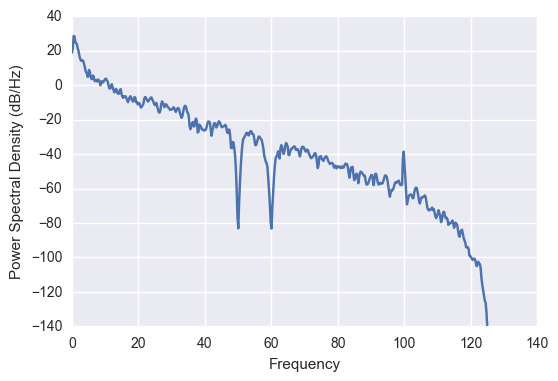

In [4]:
fulldf = pd.merge(train_in, train_out, on='ID')
EEG = fulldf[fulldf.columns[2:-2]]
viz= EEG.as_matrix()
s1 = viz[b]
plt.psd(s1, NFFT = 1024, Fs = len(s1)/(5*60))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  if __name__ == '__main__':


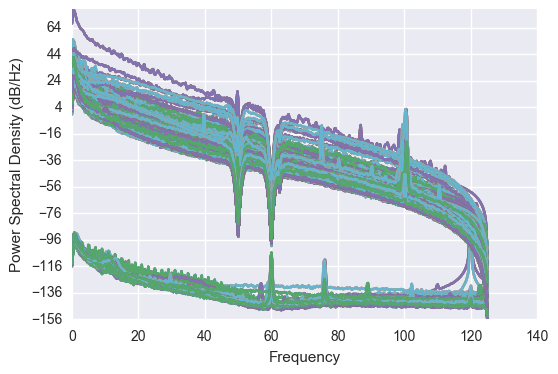

In [13]:
new_ft = np.array([[np.mean(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[0][np.any(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[1]<4)]), np.mean(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[0][np.any(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[1]>=14)])] for i in range(len(viz))])

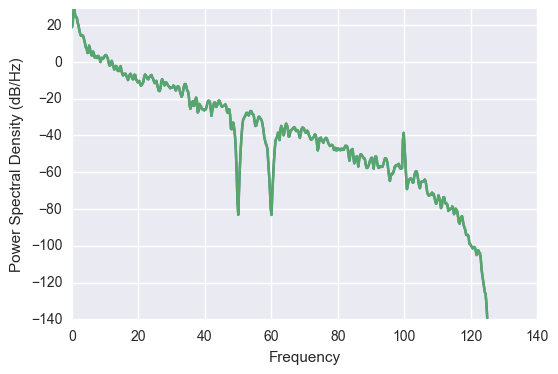

In [5]:
s2 = plt.psd(s1, NFFT = 1024, Fs = len(s1)/(5*60))[0][plt.psd(s1, NFFT = 1024, Fs = len(s1)/(5*60))[1]<4]

In [15]:
new_ft

array([[   149.25729376,    149.25729376],
       [    59.67518597,     59.67518597],
       [  3020.68219333,   3020.68219333],
       ..., 
       [   206.76810292,    206.76810292],
       [   307.56419848,    307.56419848],
       [ 14360.45051936,  14360.45051936]])

In [ ]:
, np.mean(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[0][np.any(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[1]>=4 and plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[1]<8)]), np.mean(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[0][np.any(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[1]>=8 and plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[1]<14)]), np.mean(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[0][np.any(plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[1]>=14)]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  if __name__ == '__main__':


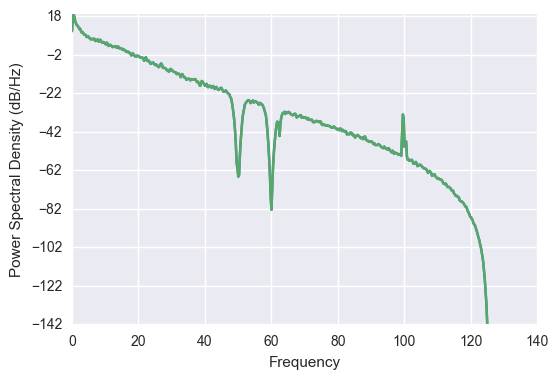

In [22]:
d = plt.psd(viz[1], NFFT = 1024, Fs = len(viz[1])/(5*60))[0][np.any(plt.psd(viz[1], NFFT = 1024, Fs = len(viz[1])/(5*60))[1]<4)]

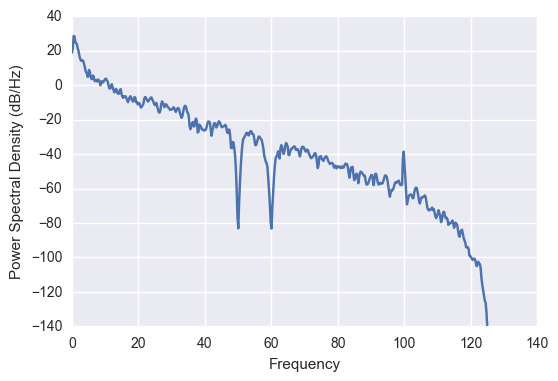

In [26]:
index = plt.psd(viz[0], NFFT = 1024, Fs = len(viz[0])/(5*60))[1]

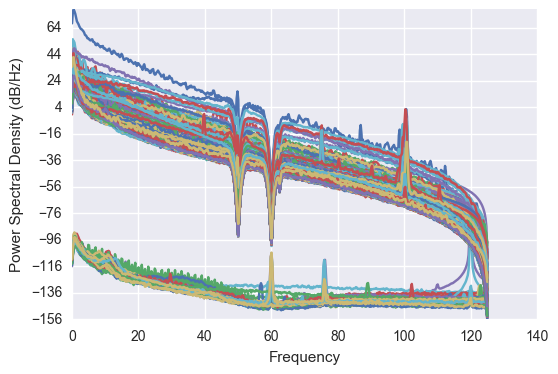

In [30]:
n_train = np.array([plt.psd(viz[i], NFFT = 1024, Fs = len(viz[i])/(5*60))[0] for i in range(len(viz)) ])

In [31]:
n_train

array([[  7.73719711e+01,   1.49257294e+02,   7.27495327e+02, ...,
          2.40408286e-13,   7.21706935e-14,   1.15159080e-14],
       [  1.05188702e+01,   5.96751860e+01,   7.80310357e+01, ...,
          3.30617190e-13,   7.20897255e-14,   6.94437824e-15],
       [  6.49390799e+02,   3.02068219e+03,   2.51350454e+03, ...,
          1.98261149e-12,   5.67578814e-13,   2.11708778e-14],
       ..., 
       [  5.16486972e+01,   2.06768103e+02,   1.59098879e+02, ...,
          4.80928458e-14,   2.40774531e-14,   5.53902127e-15],
       [  3.53628658e+01,   3.07564198e+02,   5.56506534e+02, ...,
          5.22120786e-14,   1.42261880e-14,   2.46232528e-15],
       [  2.83056561e+03,   1.43604505e+04,   1.51765147e+04, ...,
          2.95446696e-12,   5.89458875e-13,   1.66698415e-13]])

In [52]:
new_feat = np.array([np.mean(n_train[:, index<4], axis=1), np.mean(n_train[:, np.logical_and(index<8, index>=4)], axis=1), np.mean(n_train[:, np.logical_and(index<14, index>=8)], axis=1), np.mean(n_train[:, index>=14], axis=1)]).T

In [80]:
clf = svm.SVR(kernel = 'rbf', degree = 20)

In [81]:
clf.fit(new_feat, train_out.TARGET)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=20, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [82]:
y_pred = clf.predict(new_feat)
score_function(train_out.TARGET, y_pred.astype(int))

25.881088651011453

In [83]:
y_pred.astype(int)

array([38, 38, 37, 37, 45, 41, 39, 37, 40, 38, 39, 38, 41, 37, 39, 39, 37,
       37, 39, 41, 40, 41, 40, 39, 35, 41, 35, 41, 39, 39, 39, 40, 43, 38,
       37, 42, 41, 37, 39, 38, 37, 39, 37, 37, 39, 41, 39, 40, 38, 37, 37,
       45, 37, 37, 39, 40, 41, 39, 39, 43, 38, 36, 44, 37, 37, 37, 37, 37,
       37, 40, 39, 37, 39, 45, 41, 41, 44, 37, 35, 39, 37, 37, 37, 37, 36,
       37, 37, 39, 38, 37, 39, 37, 40, 43, 41, 43, 43, 40, 43, 35, 37, 38,
       41, 39, 41, 37, 38, 37, 39, 38, 45, 45, 38, 39, 43, 37, 39, 39, 44,
       40, 40, 40, 41, 40, 42, 44, 40, 38, 37, 39, 38, 39, 41, 41, 38, 37,
       39, 37, 42, 45, 37, 39, 39, 45, 41, 37, 40, 41, 40, 37, 45, 37, 37,
       37, 40, 39, 38, 41, 37, 40, 38, 43, 38, 41, 41, 38, 40, 35, 42, 35,
       41, 37, 37, 41, 36, 39, 45, 37, 39, 39, 35, 40, 38, 37, 37, 37, 45,
       41, 40, 39, 39, 45, 39, 39, 37, 40, 41, 39, 42, 40, 39, 45, 45, 41,
       44, 36, 37, 39, 39, 40, 37, 39, 38, 39, 37, 39, 39, 44, 37, 35, 44,
       40, 41, 39, 39, 41

In [85]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameters = {'epsilon': np.logspace(-2, 1, num=20), 'gamma': np.logspace(-2, 0, num=20), 'C': np.logspace(-2, 1, num=20)}
clf = GridSearchCV(svm.SVR(), parameters)

In [98]:
clf.fit(new_feat, train_out.TARGET)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epsilon': array([  0.01   ,   0.01438,   0.02069,   0.02976,   0.04281,   0.06158,
         0.08859,   0.12743,   0.1833 ,   0.26367,   0.37927,   0.54556,
         0.78476,   1.12884,   1.62378,   2.33572,   3.35982,   4.83293,
         6.95193,  10.     ]), 'gamma': array([ 0.01   ,  ...      0.78476,   1.12884,   1.62378,   2.33572,   3.35982,   4.83293,
         6.95193,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [99]:
y_pred = clf.predict(new_feat)
score_function(train_out.TARGET, y_pred.astype(int))

26.343831649823358

In [100]:
clf.best_estimator_

SVR(C=0.78475997035146106, cache_size=200, coef0=0.0, degree=3,
  epsilon=1.623776739188721, gamma=0.01, kernel='rbf', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False)